In [4]:
import pandas as pd
import time

# 数据加载
    data = pd.read_csv('C:\\Users\\ading\\Desktop\\Main Folder\\Avalon Ding\\Avalon Ding\\Kaikeba\\L3\\BreadBasket_DMS.csv')
# 统一小写
data['Item'] = data['Item'].str.lower()
# 去掉none项
data = data.drop(data[data.Item == 'none'].index)

# 采用efficient_apriori工具包
def rule1():
    from efficient_apriori import apriori
    start = time.time()
    # 得到一维数组orders_series，并且将Transaction作为index, value为Item取值
    orders_series = data.set_index('Transaction')['Item']
    # 将数据集进行格式转换
    transactions = []
    temp_index = 0
    for i, v in orders_series.items():
        if i != temp_index:
            temp_set = set()
            temp_index = i
            temp_set.add(v)
            transactions.append(temp_set)
        else:
            temp_set.add(v)
    
    # 挖掘频繁项集和频繁规则
    itemsets, rules = apriori(transactions, min_support=0.02,  min_confidence=0.5)
    print('频繁项集：', itemsets)
    print('关联规则：', rules)
    end = time.time()
    print("用时：", end-start)



def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
# 采用mlxtend.frequent_patterns工具包
def rule2():
    from mlxtend.frequent_patterns import apriori
    from mlxtend.frequent_patterns import association_rules
    pd.options.display.max_columns=100
    start = time.time()
    hot_encoded_df=data.groupby(['Transaction','Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')
    hot_encoded_df = hot_encoded_df.applymap(encode_units)
    frequent_itemsets = apriori(hot_encoded_df, min_support=0.02, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)
    print("频繁项集：", frequent_itemsets)
    print("关联规则：", rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.5) ])
    #print(rules['confidence'])
    end = time.time()
    print("用时：", end-start)

rule1()
print('-'*100)
rule2()

频繁项集： {1: {('alfajores',): 344, ('bread',): 3096, ('brownie',): 379, ('cake',): 983, ('coffee',): 4528, ('cookies',): 515, ('farm house',): 371, ('hot chocolate',): 552, ('juice',): 365, ('medialuna',): 585, ('muffin',): 364, ('pastry',): 815, ('sandwich',): 680, ('scandinavian',): 275, ('scone',): 327, ('soup',): 326, ('tea',): 1350, ('toast',): 318, ('truffles',): 192}, 2: {('bread', 'cake'): 221, ('bread', 'coffee'): 852, ('bread', 'pastry'): 276, ('bread', 'tea'): 266, ('cake', 'coffee'): 518, ('cake', 'tea'): 225, ('coffee', 'cookies'): 267, ('coffee', 'hot chocolate'): 280, ('coffee', 'juice'): 195, ('coffee', 'medialuna'): 333, ('coffee', 'pastry'): 450, ('coffee', 'sandwich'): 362, ('coffee', 'tea'): 472, ('coffee', 'toast'): 224}}
关联规则： [{cake} -> {coffee}, {cookies} -> {coffee}, {hot chocolate} -> {coffee}, {juice} -> {coffee}, {medialuna} -> {coffee}, {pastry} -> {coffee}, {sandwich} -> {coffee}, {toast} -> {coffee}]
用时： 0.1959996223449707
-----------------------------------

In [7]:
orders_series = data.set_index('Transaction')['Item']
orders_series.head()

Transaction
2     scandinavian
2     scandinavian
3    hot chocolate
3              jam
3          cookies
Name: Item, dtype: object

In [8]:
    transactions = []
    temp_index = 0
    for i, v in orders_series.items():
        if i != temp_index:
            temp_set = set()
            temp_index = i
            temp_set.add(v)
            transactions.append(temp_set)
        else:
            temp_set.add(v)

In [13]:
orders_series.items

<bound method Series.iteritems of Transaction
2               scandinavian
2               scandinavian
3              hot chocolate
3                        jam
3                    cookies
4                     muffin
5                     coffee
5                     pastry
5                      bread
6                  medialuna
6                     pastry
6                     muffin
7                  medialuna
7                     pastry
7                     coffee
7                        tea
8                     pastry
8                      bread
9                      bread
9                     muffin
10              scandinavian
10                 medialuna
11                     bread
11                 medialuna
11                     bread
12                       jam
12                    coffee
12                   tartine
12                    pastry
12                       tea
                ...         
9670              farm house
9671                   bre

In [11]:
transactions[0:10]

[{'scandinavian'},
 {'cookies', 'hot chocolate', 'jam'},
 {'muffin'},
 {'bread', 'coffee', 'pastry'},
 {'medialuna', 'muffin', 'pastry'},
 {'coffee', 'medialuna', 'pastry', 'tea'},
 {'bread', 'pastry'},
 {'bread', 'muffin'},
 {'medialuna', 'scandinavian'},
 {'bread', 'medialuna'}]

In [30]:
data_marketbasket = pd.read_csv('C:\\Users\\ading\\Desktop\\Main Folder\\Avalon Ding\\Avalon Ding\\Kaikeba\\L3\\Market_Basket_Optimisation.csv', header = None)

In [32]:
data_marketbasket.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7500,eggs,frozen smoothie,yogurt cake,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
pd.read_csv?

In [42]:
set_temp = set(data_marketbasket.loc[7496,:])

In [51]:
set_temp

{'butter', 'fresh bread', 'light mayo', nan}

In [46]:
set_1 = set(data_marketbasket)

In [63]:
mkt_transactions = []
mkt_set = set()
mkt_index = 0
for x in data_marketbasket.index:
    if x == mkt_index:
        mkt_set = set(data_marketbasket.loc[x,:])
        mkt_set = {x for x in mkt_set if x==x}
        mkt_transactions.append(mkt_set)
        mkt_index = mkt_index + 1       

In [64]:
mkt_transactions

[{'almonds',
  'antioxydant juice',
  'avocado',
  'cottage cheese',
  'energy drink',
  'frozen smoothie',
  'green grapes',
  'green tea',
  'honey',
  'low fat yogurt',
  'mineral water',
  'olive oil',
  'salad',
  'salmon',
  'shrimp',
  'spinach',
  'tomato juice',
  'vegetables mix',
  'whole weat flour',
  'yams'},
 {'burgers', 'eggs', 'meatballs'},
 {'chutney'},
 {'avocado', 'turkey'},
 {'energy bar', 'green tea', 'milk', 'mineral water', 'whole wheat rice'},
 {'low fat yogurt'},
 {'french fries', 'whole wheat pasta'},
 {'light cream', 'shallot', 'soup'},
 {'frozen vegetables', 'green tea', 'spaghetti'},
 {'french fries'},
 {'eggs', 'pet food'},
 {'cookies'},
 {'burgers', 'cooking oil', 'eggs', 'mineral water', 'turkey'},
 {'champagne', 'cookies', 'spaghetti'},
 {'mineral water', 'salmon'},
 {'mineral water'},
 {'chicken',
  'chocolate',
  'cooking oil',
  'honey',
  'low fat yogurt',
  'oil',
  'shrimp'},
 {'eggs', 'turkey'},
 {'black tea',
  'chicken',
  'eggs',
  'extra dar

In [5]:
from efficient_apriori import apriori
start = time.time()
# 得到一维数组orders_series，并且将Transaction作为index, value为Item取值
mkt_transactions = []
mkt_set = set()
mkt_index = 0
for x in data_marketbasket.index:
    if x == mkt_index:
        mkt_set = set(data_marketbasket.loc[x,:])
        mkt_set = {x for x in mkt_set if x==x}
        mkt_transactions.append(mkt_set)
        mkt_index = mkt_index + 1       

In [7]:
mkt_transactions[0:2]

[{'almonds',
  'antioxydant juice',
  'avocado',
  'cottage cheese',
  'energy drink',
  'frozen smoothie',
  'green grapes',
  'green tea',
  'honey',
  'low fat yogurt',
  'mineral water',
  'olive oil',
  'salad',
  'salmon',
  'shrimp',
  'spinach',
  'tomato juice',
  'vegetables mix',
  'whole weat flour',
  'yams'},
 {'burgers', 'eggs', 'meatballs'}]

In [1]:
import pandas as pd
import time

data_marketbasket = pd.read_csv('C:\\Users\\ading\\Desktop\\Main Folder\\Avalon Ding\\Avalon Ding\\Kaikeba\\L3\\Market_Basket_Optimisation.csv', header = None)

def rule1_mkt():
    from efficient_apriori import apriori
    start = time.time()
    # 得到一维数组orders_series，并且将Transaction作为index, value为Item取值
    mkt_transactions = []
    mkt_set = set()
    mkt_index = 0
    for x in data_marketbasket.index:
        if x == mkt_index:
            mkt_set = set(data_marketbasket.loc[x,:])
            mkt_set = {x for x in mkt_set if x==x}
            mkt_transactions.append(mkt_set)
            mkt_index = mkt_index + 1       
    
    # 挖掘频繁项集和频繁规则
    itemsets, rules = apriori(mkt_transactions, min_support=0.02,  min_confidence=0.1)
    print('频繁项集：', itemsets)
    print('关联规则：', rules)
    end = time.time()
    print("用时：", end-start)
    
rule1_mkt()

频繁项集： {1: {('almonds',): 153, ('avocado',): 250, ('brownies',): 253, ('burgers',): 654, ('butter',): 226, ('cake',): 608, ('cereals',): 193, ('champagne',): 351, ('chicken',): 450, ('chocolate',): 1229, ('cookies',): 603, ('cooking oil',): 383, ('cottage cheese',): 239, ('eggs',): 1348, ('energy bar',): 203, ('energy drink',): 200, ('escalope',): 595, ('french fries',): 1282, ('french wine',): 169, ('fresh bread',): 323, ('fresh tuna',): 167, ('frozen smoothie',): 475, ('frozen vegetables',): 715, ('grated cheese',): 393, ('green tea',): 991, ('ground beef',): 737, ('ham',): 199, ('herb & pepper',): 371, ('honey',): 356, ('hot dogs',): 243, ('light mayo',): 204, ('low fat yogurt',): 574, ('meatballs',): 157, ('milk',): 972, ('mineral water',): 1788, ('muffins',): 181, ('oil',): 173, ('olive oil',): 494, ('pancakes',): 713, ('pepper',): 199, ('red wine',): 211, ('salmon',): 319, ('shrimp',): 536, ('soup',): 379, ('spaghetti',): 1306, ('strawberries',): 160, ('tomato juice',): 228, ('tom

In [6]:
mkt_transactions = []
mkt_set = set()
mkt_index = 0
for x in data_marketbasket.index:
    if x == mkt_index:
        mkt_set = set(data_marketbasket.loc[x,:])
        mkt_set = {x for x in mkt_set if x==x}
        mkt_transactions.append(mkt_set)
        mkt_index = mkt_index + 1  
mkt_transactions

[{'almonds',
  'antioxydant juice',
  'avocado',
  'cottage cheese',
  'energy drink',
  'frozen smoothie',
  'green grapes',
  'green tea',
  'honey',
  'low fat yogurt',
  'mineral water',
  'olive oil',
  'salad',
  'salmon',
  'shrimp',
  'spinach',
  'tomato juice',
  'vegetables mix',
  'whole weat flour',
  'yams'},
 {'burgers', 'eggs', 'meatballs'},
 {'chutney'},
 {'avocado', 'turkey'},
 {'energy bar', 'green tea', 'milk', 'mineral water', 'whole wheat rice'},
 {'low fat yogurt'},
 {'french fries', 'whole wheat pasta'},
 {'light cream', 'shallot', 'soup'},
 {'frozen vegetables', 'green tea', 'spaghetti'},
 {'french fries'},
 {'eggs', 'pet food'},
 {'cookies'},
 {'burgers', 'cooking oil', 'eggs', 'mineral water', 'turkey'},
 {'champagne', 'cookies', 'spaghetti'},
 {'mineral water', 'salmon'},
 {'mineral water'},
 {'chicken',
  'chocolate',
  'cooking oil',
  'honey',
  'low fat yogurt',
  'oil',
  'shrimp'},
 {'eggs', 'turkey'},
 {'black tea',
  'chicken',
  'eggs',
  'extra dar

In [8]:
mkt_transactions[0]

{'almonds',
 'antioxydant juice',
 'avocado',
 'cottage cheese',
 'energy drink',
 'frozen smoothie',
 'green grapes',
 'green tea',
 'honey',
 'low fat yogurt',
 'mineral water',
 'olive oil',
 'salad',
 'salmon',
 'shrimp',
 'spinach',
 'tomato juice',
 'vegetables mix',
 'whole weat flour',
 'yams'}

In [9]:
mkt_transactions_kw = " ".join(mkt_transactions[0])

In [15]:
mkt_transactions[-1]

{'eggs', 'frozen smoothie', 'low fat yogurt', 'yogurt cake'}

根据词频，开始生成词云!


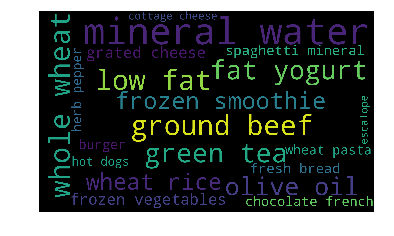

In [9]:
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from lxml import etree
from nltk.tokenize import word_tokenize

# 去掉停用词
#def remove_stop_words(f):
#    stop_words = ['Movie']
#    for stop_word in stop_words:
#        f = f.replace(stop_word, '')
#    return f

# 数据变换
def create_word_cloud(f):
    print('根据词频，开始生成词云!')
#    f = remove_stop_words(f)
    cut_text = word_tokenize(f)
    #print(cut_text)
    cut_text = " ".join(cut_text)
    wc = WordCloud(
        max_words=20,
        width=2000,
        height=1200,
    )
    wordcloud = wc.generate(cut_text)
    # 写词云图片
    wordcloud.to_file("wordcloud_basket_2.jpg")
    # 显示词云文件
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

# 数据加载
#data = pd.read_csv('C:\\Users\\ading\\Desktop\\Main Folder\\Avalon Ding\\Avalon Ding\\Kaikeba\\L3\\movies.csv')
# 读取title 和 genres字段
#title = " ".join(data['title'])
#genres = " ".join(data['genres'])
#all_word = title + genres
# 生成词云
mkt_transactions_kw = ""
for i in mkt_transactions:
    mkt_transactions_kw = mkt_transactions_kw + " ".join(i)
    
create_word_cloud(mkt_transactions_kw)

In [3]:
import pandas as pd
import time

# 数据加载
data = pd.read_csv('C:\\Users\\ading\\Desktop\\Main Folder\\Avalon Ding\\Avalon Ding\\Kaikeba\\L3\\BreadBasket_DMS.csv')
# 统一小写
data['Item'] = data['Item'].str.lower()
# 去掉none项
data = data.drop(data[data.Item == 'none'].index)

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
# 采用mlxtend.frequent_patterns工具包
def rule2_mkt():
    from mlxtend.frequent_patterns import apriori
    from mlxtend.frequent_patterns import association_rules
    pd.options.display.max_columns=100
    start = time.time()
    hot_encoded_df=data.groupby(['Transaction','Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')
    hot_encoded_df = hot_encoded_df.applymap(encode_units)
    frequent_itemsets = apriori(hot_encoded_df, min_support=0.02, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)
    print("频繁项集：", frequent_itemsets)
    print("关联规则：", rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.5) ])
    #print(rules['confidence'])
    end = time.time()
    print("用时：", end-start)
    
rule2_mkt()

频繁项集：      support                 itemsets
0   0.036348              (alfajores)
1   0.327134                  (bread)
2   0.040046                (brownie)
3   0.103867                   (cake)
4   0.478445                 (coffee)
5   0.054417                (cookies)
6   0.039201             (farm house)
7   0.058326          (hot chocolate)
8   0.038567                  (juice)
9   0.061813              (medialuna)
10  0.038462                 (muffin)
11  0.086116                 (pastry)
12  0.071851               (sandwich)
13  0.029057           (scandinavian)
14  0.034552                  (scone)
15  0.034446                   (soup)
16  0.142646                    (tea)
17  0.033601                  (toast)
18  0.020287               (truffles)
19  0.023352            (bread, cake)
20  0.090025          (coffee, bread)
21  0.029163          (pastry, bread)
22  0.028107             (bread, tea)
23  0.054734           (coffee, cake)
24  0.023774              (cake, tea)
25  0.

In [4]:
hot_encoded_df=data.groupby(['Transaction','Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')

In [34]:
hot_encoded_df.head(10)

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,bowl nic pitt,bread,bread pudding,brioche and salami,brownie,cake,caramel bites,cherry me dried fruit,chicken sand,chicken stew,chimichurri oil,chocolates,christmas common,coffee,coffee granules,coke,cookies,crepes,crisps,drinking chocolate spoons,duck egg,dulce de leche,eggs,ella's kitchen pouches,empanadas,extra salami or feta,fairy doors,farm house,focaccia,frittata,fudge,gift voucher,gingerbread syrup,granola,hack the stack,half slice monster,hearty & seasonal,honey,hot chocolate,jam,jammie dodgers,juice,keeping it local,kids biscuit,lemon and coconut,medialuna,mighty protein,mineral water,mortimer,muesli,muffin,my-5 fruit shoot,nomad bag,olum & polenta,panatone,pastry,pick and mix bowls,pintxos,polenta,postcard,raspberry shortbread sandwich,raw bars,salad,sandwich,scandinavian,scone,siblings,smoothies,soup,spanish brunch,spread,tacos/fajita,tartine,tea,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [40]:
data_marketbasket = pd.read_csv('C:\\Users\\ading\\Desktop\\Main Folder\\Avalon Ding\\Avalon Ding\\Kaikeba\\L3\\Market_Basket_Optimisation.csv', header = None)

mkt_transactions = []
mkt_set = set()
mkt_index = 0
for x in data_marketbasket.index:
    if x == mkt_index:
        mkt_set = set(data_marketbasket.loc[x,:])
        mkt_set = {x for x in mkt_set if x==x}
        mkt_transactions.append(mkt_set)
        mkt_index = mkt_index + 1  
#mkt_transactions

In [114]:
item_category = []
for i in data_marketbasket.index:
    for c in data_marketbasket.columns:
        if data_marketbasket.loc[i,c] not in item_category:
            item_category.append(data_marketbasket.loc[i,c])

In [115]:
item_category

['shrimp',
 'almonds',
 'avocado',
 'vegetables mix',
 'green grapes',
 'whole weat flour',
 'yams',
 'cottage cheese',
 'energy drink',
 'tomato juice',
 'low fat yogurt',
 'green tea',
 'honey',
 'salad',
 'mineral water',
 'salmon',
 'antioxydant juice',
 'frozen smoothie',
 'spinach',
 'olive oil',
 'burgers',
 'meatballs',
 'eggs',
 nan,
 'chutney',
 'turkey',
 'milk',
 'energy bar',
 'whole wheat rice',
 'whole wheat pasta',
 'french fries',
 'soup',
 'light cream',
 'shallot',
 'frozen vegetables',
 'spaghetti',
 'pet food',
 'cookies',
 'cooking oil',
 'champagne',
 'chocolate',
 'chicken',
 'oil',
 'fresh tuna',
 'tomatoes',
 'black tea',
 'extra dark chocolate',
 'protein bar',
 'red wine',
 'pasta',
 'pepper',
 'shampoo',
 'rice',
 'sparkling water',
 'ham',
 'body spray',
 'pancakes',
 'grated cheese',
 'white wine',
 'toothpaste',
 'parmesan cheese',
 'fresh bread',
 'ground beef',
 'escalope',
 'herb & pepper',
 'tomato sauce',
 'magazines',
 'strawberries',
 'strong chee

In [132]:
df_mktbasket = pd.DataFrame(index = data_marketbasket.index, columns = item_category)

In [133]:
for i in data_marketbasket.index:
    for c in data_marketbasket.columns:
        if data_marketbasket.loc[i,c] in item_category:
            df_mktbasket.loc[i, '{}'.format(data_marketbasket.loc[i,c])] = 1
            

In [138]:
df_mktbasket_clean = df_mktbasket.drop(columns='nan').fillna(0)

In [6]:
import pandas as pd
import time

# 数据加载
data_marketbasket = pd.read_csv('C:\\Users\\ading\\Desktop\\Main Folder\\Avalon Ding\\Avalon Ding\\Kaikeba\\L3\\Market_Basket_Optimisation.csv', header = None)

# 找到所有unique的items
item_category = []
for i in data_marketbasket.index:
    for c in data_marketbasket.columns:
        if data_marketbasket.loc[i,c] not in item_category:
            item_category.append(data_marketbasket.loc[i,c])

# 以这些unique items为列名，生成新的dataframe，index照搬原数据
df_mktbasket = pd.DataFrame(index = data_marketbasket.index, columns = item_category)

# 通过遍历原数据，用0，1填写新的dataframe
for i in data_marketbasket.index:
    for c in data_marketbasket.columns:
        if data_marketbasket.loc[i,c] in item_category:
            df_mktbasket.loc[i, '{}'.format(data_marketbasket.loc[i,c])] = 1
df_mktbasket_clean = df_mktbasket.drop(columns='nan').fillna(0)

# 采用mlxtend.frequent_patterns工具包
def rule2_mkt():
    from mlxtend.frequent_patterns import apriori
    from mlxtend.frequent_patterns import association_rules
    pd.options.display.max_columns=100
    start = time.time()
    frequent_itemsets = apriori(df_mktbasket_clean, min_support=0.02, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)
    print("频繁项集：", frequent_itemsets)
    print("关联规则：", rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.3) ])
    #print(rules['confidence'])
    end = time.time()
    print("用时：", end-start)
    
rule2_mkt()

频繁项集：       support                        itemsets
0    0.071457                        (shrimp)
1    0.020397                       (almonds)
2    0.033329                       (avocado)
3    0.025730                (vegetables mix)
4    0.031862                (cottage cheese)
5    0.026663                  (energy drink)
6    0.030396                  (tomato juice)
7    0.076523                (low fat yogurt)
8    0.132116                     (green tea)
9    0.047460                         (honey)
10   0.238368                 (mineral water)
11   0.042528                        (salmon)
12   0.063325               (frozen smoothie)
13   0.065858                     (olive oil)
14   0.087188                       (burgers)
15   0.020931                     (meatballs)
16   0.179709                          (eggs)
17   0.062525                        (turkey)
18   0.129583                          (milk)
19   0.027063                    (energy bar)
20   0.058526              (

In [144]:
# 采用mlxtend.frequent_patterns工具包
def rule2_mkt():
    from mlxtend.frequent_patterns import apriori
    from mlxtend.frequent_patterns import association_rules
    pd.options.display.max_columns=100
    start = time.time()
    frequent_itemsets = apriori(df_mktbasket_clean, min_support=0.02, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)
    print("频繁项集：", frequent_itemsets)
    print("关联规则：", rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.3) ])
    #print(rules['confidence'])
    end = time.time()
    print("用时：", end-start)
    
rule2_mkt()

频繁项集：       support                        itemsets
0    0.071457                        (shrimp)
1    0.020397                       (almonds)
2    0.033329                       (avocado)
3    0.025730                (vegetables mix)
4    0.031862                (cottage cheese)
5    0.026663                  (energy drink)
6    0.030396                  (tomato juice)
7    0.076523                (low fat yogurt)
8    0.132116                     (green tea)
9    0.047460                         (honey)
10   0.238368                 (mineral water)
11   0.042528                        (salmon)
12   0.063325               (frozen smoothie)
13   0.065858                     (olive oil)
14   0.087188                       (burgers)
15   0.020931                     (meatballs)
16   0.179709                          (eggs)
17   0.062525                        (turkey)
18   0.129583                          (milk)
19   0.027063                    (energy bar)
20   0.058526              (